# MNE-Python: From raw data to epochs and evoked responses (ERF/ERP)

`Code source : Alexandre Gramfort, Denis A. Engemann, Jona Sassenhagen and Richard Höchenberger
 Modified by Annalisa Pascarella, Vanessa Hadid`

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load the mne package


In [2]:
import mne
print(mne.__version__)

1.9.0


We set the logging level to 'warning' so the output will be less verbose

In [3]:
mne.set_log_level('warning')

## Download sample dataset

Now we import the [`sample`](https://mne.tools/stable/documentation/datasets.html#sample-dataset) dataset. It will be downloaded automatically (approx. 2 GB).

In [4]:
from mne.datasets import sample
data_path = sample.data_path()

raw_fname = os.path.join(data_path, 'MEG/sample/sample_audvis_filt-0-40_raw.fif')
print(raw_fname)

/home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


## Read data from file

To see what a function does...use this notation!


In [5]:
mne.io.read_raw_fif?

Signature:
mne.io.read_raw_fif(
    fname,
    allow_maxshield=False,
    preload=False,
    on_split_missing='raise',
    verbose=None,
) -> mne.io.fiff.raw.Raw
Docstring:
Reader function for Raw FIF data.

Parameters
----------
fname : path-like | file-like
    The raw filename to load. For files that have automatically been split,
    the split part will be automatically loaded. Filenames should end
    with raw.fif, raw.fif.gz, raw_sss.fif, raw_sss.fif.gz, raw_tsss.fif,
    raw_tsss.fif.gz, or _meg.fif. If a file-like object is provided,
    preloading must be used.

    .. versionchanged:: 0.18
       Support for file-like objects.
allow_maxshield : bool | str (default False)
    If True, allow loading of data that has been recorded with internal
    active compensation (MaxShield). Data recorded with MaxShield should
    generally not be loaded directly, but should first be processed using
    SSS/tSSS to remove the compensation signals that may also affect brain
    activity. Ca

In [6]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)
print(raw)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MiB, data loaded>


If `preload=True` data will be preloaded into memory for data manipulation and faster indexing (requires large amount of memory). By default, the data will not be loaded into memory.
    
Printing the [`Raw`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) object displays some basic information like the total number of channels, the number of time points at which the data were sampled, total duration, and the approximate size in memory. 


Now let's take a look at the measurement info stored in the `raw.info` attribute.  It will provide details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.


In [7]:
print(raw.info)

<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


`raw.info` is just a dictionary and like Python dictionaries has a `.keys()` method that shows all the available field names

In [8]:
isinstance(raw.info, dict)
print(raw.info.keys())

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


So we can access its elements this way:

In [9]:
raw.info['sfreq']  # Sampling frequency

150.15374755859375

In [10]:
raw.info['bads']  # list of marked bad channels

['MEG 2443', 'EEG 053']

Looking at the info dict we observe that data were already filtered.

Now, let's see what channels are present in the data. We simply have to take a loot at the `raw.ch_names` attribute.

In [11]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

You can index it as a list

In [12]:
raw.ch_names[42]

'MEG 0432'

In [13]:
raw.ch_names[:10]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

Channel type of a specific channel

In [14]:
mne.channel_type?

Signature: mne.channel_type(info, idx)
Docstring:
Get channel type.

Parameters
----------

info : mne.Info
    The :class:`mne.Info` object with information about the sensors and methods of measurement.
idx : int
    Index of channel.

Returns
-------
type : str
    Type of channel. Will be one of::

        {'bio', 'chpi', 'dbs', 'dipole', 'ecg', 'ecog', 'eeg', 'emg',
        'eog', 'exci', 'eyetrack', 'fnirs', 'gof', 'gsr', 'ias', 'misc',
        'meg', 'ref_meg', 'resp', 'seeg', 'stim', 'syst', 'temperature'}
File:      ~/GitHub/cocolab/mne_meeg_ml_main/env/lib/python3.10/site-packages/mne/_fiff/pick.py
Type:      function

In [15]:
channel_type = mne.channel_type(info=raw.info, idx=75)
print('Channel #75 is of type:', channel_type)

channel_type = mne.channel_type(info=raw.info, idx=320)
print('Channel #320 is of type:', channel_type)

Channel #75 is of type: grad
Channel #320 is of type: eeg


`raw.info['chs']` contains all the details about the sensors (type, locations, coordinate frame etc.)

In [16]:
len(raw.info['chs'])

376

In [17]:
type(raw.info['chs'])

list

In [18]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 1.0,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [19]:
raw.info['chs'][330]

{'scanno': 331,
 'logno': 16,
 'kind': 2 (FIFFV_EEG_CH),
 'range': 1.0,
 'cal': 0.0001875000016298145,
 'coil_type': 1 (FIFFV_COIL_EEG),
 'loc': array([ 0.06725728,  0.05876905,  0.0723644 ,  0.00235201,  0.11096951,
        -0.03500458,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ]),
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'EEG 016',
 'coord_frame': 4 (FIFFV_COORD_HEAD)}

It is possible to rename channels using the [`rename_channels()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.rename_channels) method

In [20]:
raw.rename_channels({"EOG 061": "blink detector"})

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MiB, data loaded>

To visualize the sensor locations we can use [`plot_sensors()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot_sensors) method.

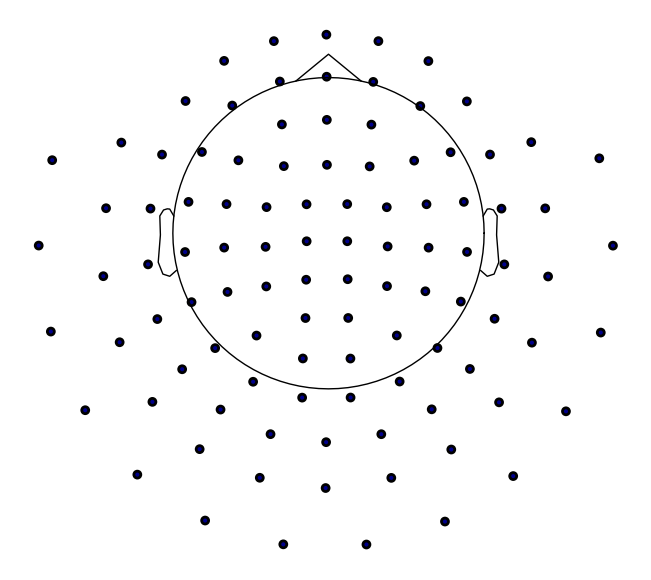

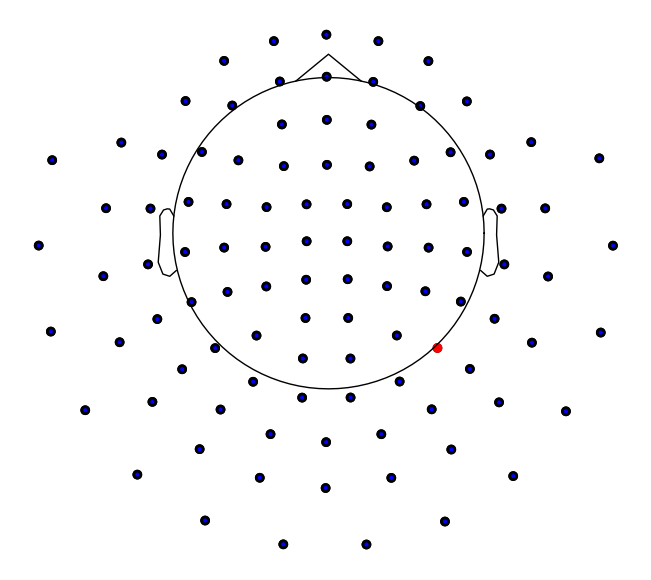

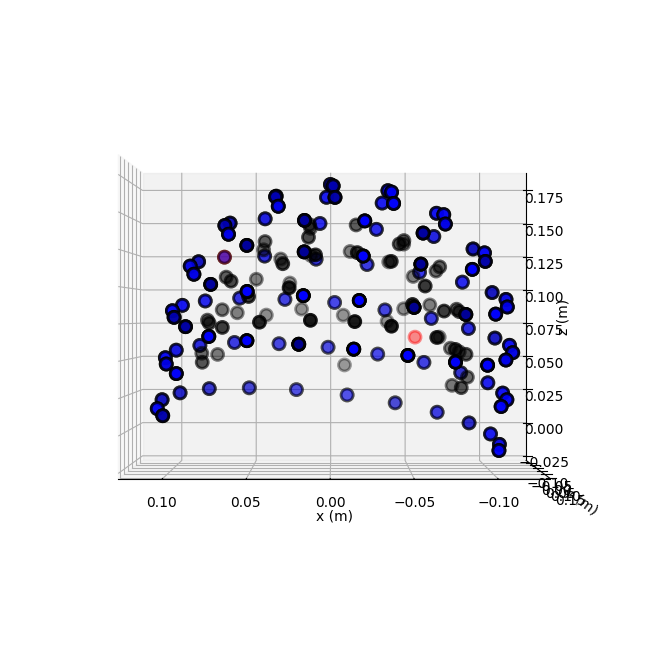

In [21]:
raw.plot_sensors(kind='topomap', ch_type='mag');  # default topomap
raw.plot_sensors(ch_type='grad');
raw.plot_sensors(kind="3d", ch_type="all");

The [Working with sensor locations](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py) tutorial describes how to read and plot sensor locations, and how MNE-Python handles physical locations of sensors.

# Extracting data from `Raw` objects

To access the data, just use the `[]` syntax as to access any element of a list, dict etc. MNE-Python also returns an array of times (in seconds) corresponding to the requested samples.

In [22]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(376, 10)
(10,)


In [23]:
times  # in seconds

array([0.        , 0.00665984, 0.01331968, 0.01997952, 0.02663936,
       0.0332992 , 0.03995904, 0.04661888, 0.05327872, 0.05993856])

To extract data in a given time window

In [24]:
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[-1.20292928e-11, -9.85012327e-12, -6.24618310e-12,
        -5.81858254e-12, -8.26709172e-12, -9.47390603e-12,
        -8.40260120e-12, -7.93950648e-12, -8.96571088e-12,
        -8.95602112e-12, -7.15093074e-12, -6.00786247e-12,
        -6.54294063e-12, -6.84192232e-12, -5.98871103e-12,
        -5.25860162e-12, -4.93539186e-12, -3.89230469e-12,
        -2.65788192e-12, -3.34004505e-12, -6.19225374e-12,
        -9.04604833e-12, -1.01161679e-11, -9.28920758e-12,
        -7.37394236e-12, -6.03751556e-12, -7.31197351e-12,
        -1.09924238e-11, -1.36405519e-11, -1.24221320e-11,
        -9.01332828e-12, -7.46900280e-12, -9.03368340e-12,
        -1.14004407e-11, -1.23697337e-11, -1.16285216e-11,
        -9.52985206e-12, -7.14492118e-12, -7.11247777e-12,
        -1.09266820e-11, -1.54418731e-11, -1.58643113e-11,
        -1.23587284e-11, -9.66064248e-12, -1.00467018e-11,
        -1.12617940e-11, -1.16725618e-11, -1.23317045e-11,
        -1.31183629e-11, -1.20719410e-11, -9.88306477e-

To get all data you can use the `get_data()` method

In [25]:
data = raw.get_data()
print(data.shape)

(376, 41700)


# Visualizing raw data

Note : we will use the QT backend from matplotlib that will open a separate window.

In [26]:
%matplotlib qt
fig = raw.plot()

In [27]:
raw.info['bads']

['MEG 2443', 'EEG 053']

In [28]:
fig = raw.copy().pick_types(meg=False, eeg=True).plot() # to plot only EEG data

# Filtering

In [29]:
raw_beta = raw.copy().filter(l_freq=13, h_freq=30, verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.019 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    0.5s finished


In [30]:
print(raw_beta.info)  # note the update of raw.info['lowpass'] and raw.info['highpass']

<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 13.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 30.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


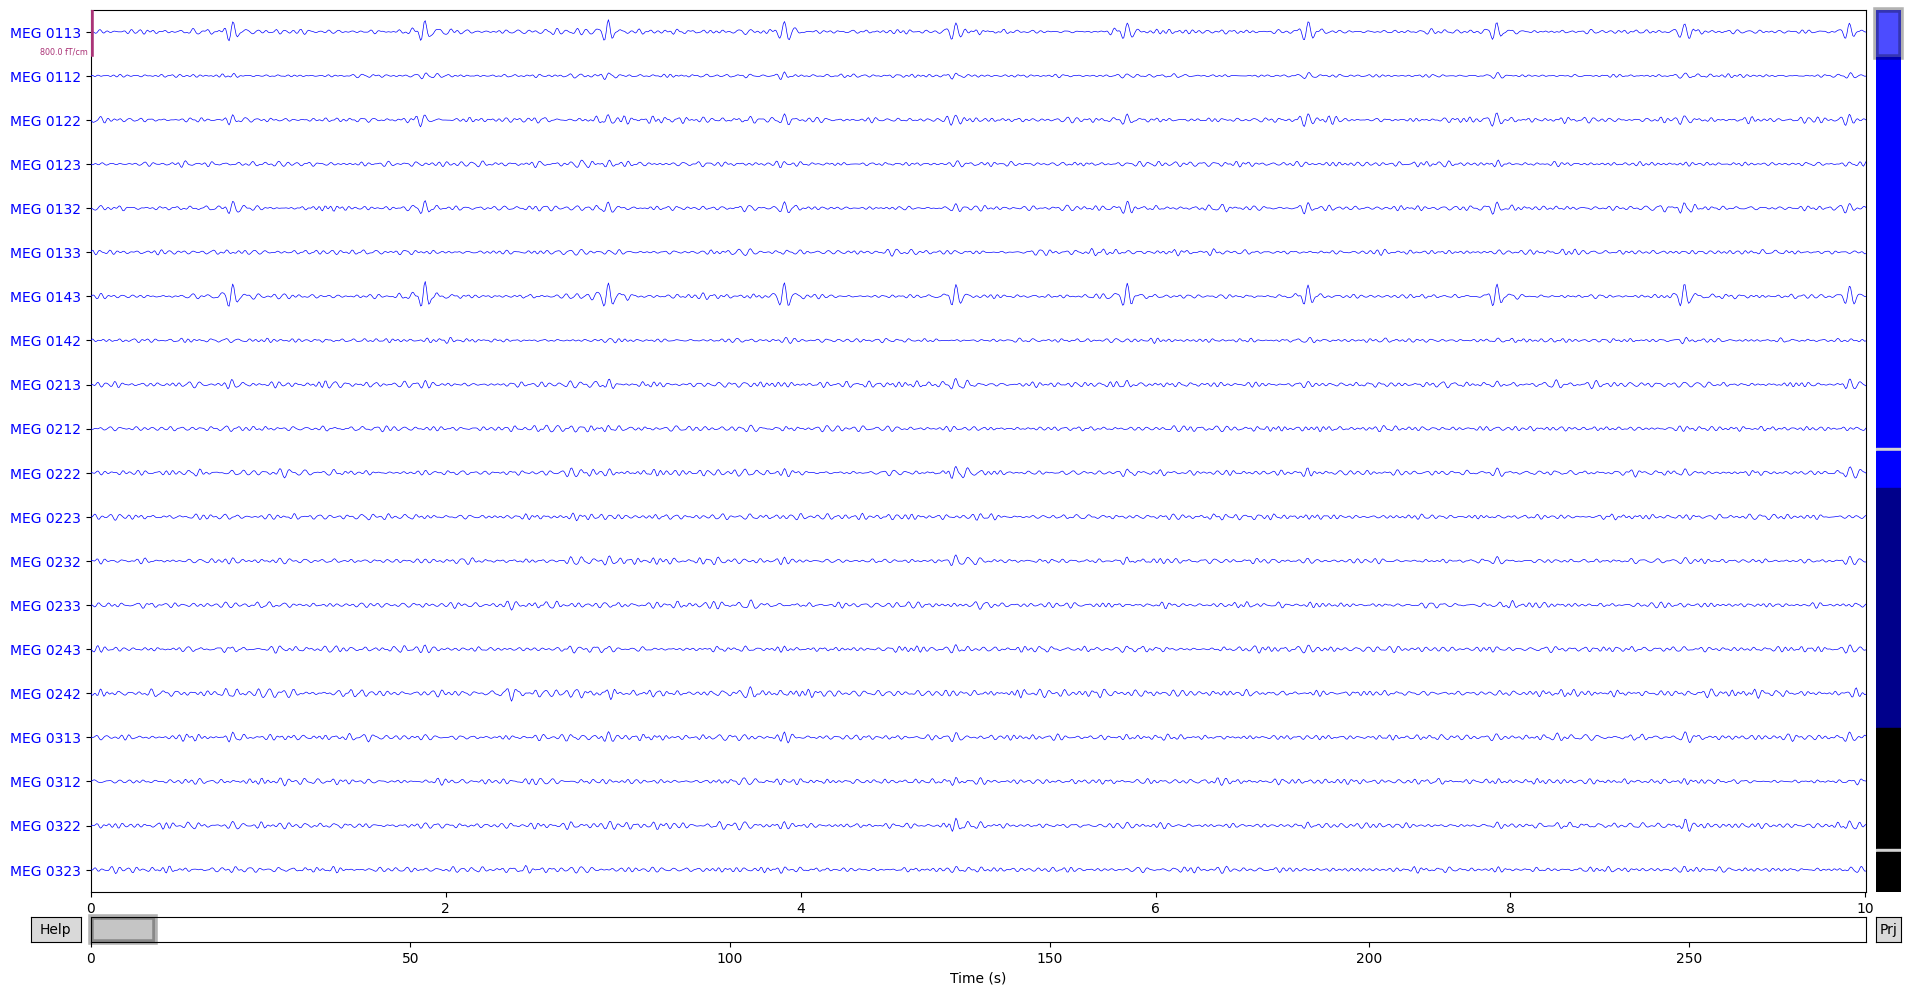

In [31]:
raw_beta.plot()

In [32]:
raw_beta.filter?

Signature:
raw_beta.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=None,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels/vertices.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types,

## Exercise
Plot the 10 first seconds of the stimutation channel `STI 014` just using matplotlib.

Tips:

- Find the channel index using `raw.ch_names.index('STI 014')`
- Get the data for this channel
- Plot it using `plt.plot`


# Define and read epochs

Let us now see how events are represented and used in MNE.

## First, extract events.
The [`sample`](https://mne.tools/stable/documentation/datasets.html#sample-dataset) dataset includes experimental events recorded on stim channel `STI 014`. The events are parsed from this channel using [`mne.find_events()`](https://mne.tools/stable/generated/mne.find_events.html#mne.find_events) method:

In [33]:
events = mne.find_events(raw, stim_channel='STI 014', verbose=True)
print(events.shape)
print(type(events))

319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
(319, 3)
<class 'numpy.ndarray'>


LA - 1 - Response to left-ear auditory stimulus \
RA - 2 - Response to right-ear auditory stimulus \
LV - 3 - Response to left visual field stimulus \
RV - 4 - Response to right visual field stimulus \
smiley - 5 - Response to the smiley face \
button - 32 - Response triggered by the button press

In [34]:
print(events[:5])  # events is a 2d array, (time, previous, trigger)

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


See [`events`](https://mne.tools/stable/documentation/glossary.html#term-events) for more information.

In [35]:
len(events[events[:, 2] == 4])

70

In [36]:
len(events)

319

## Plot events

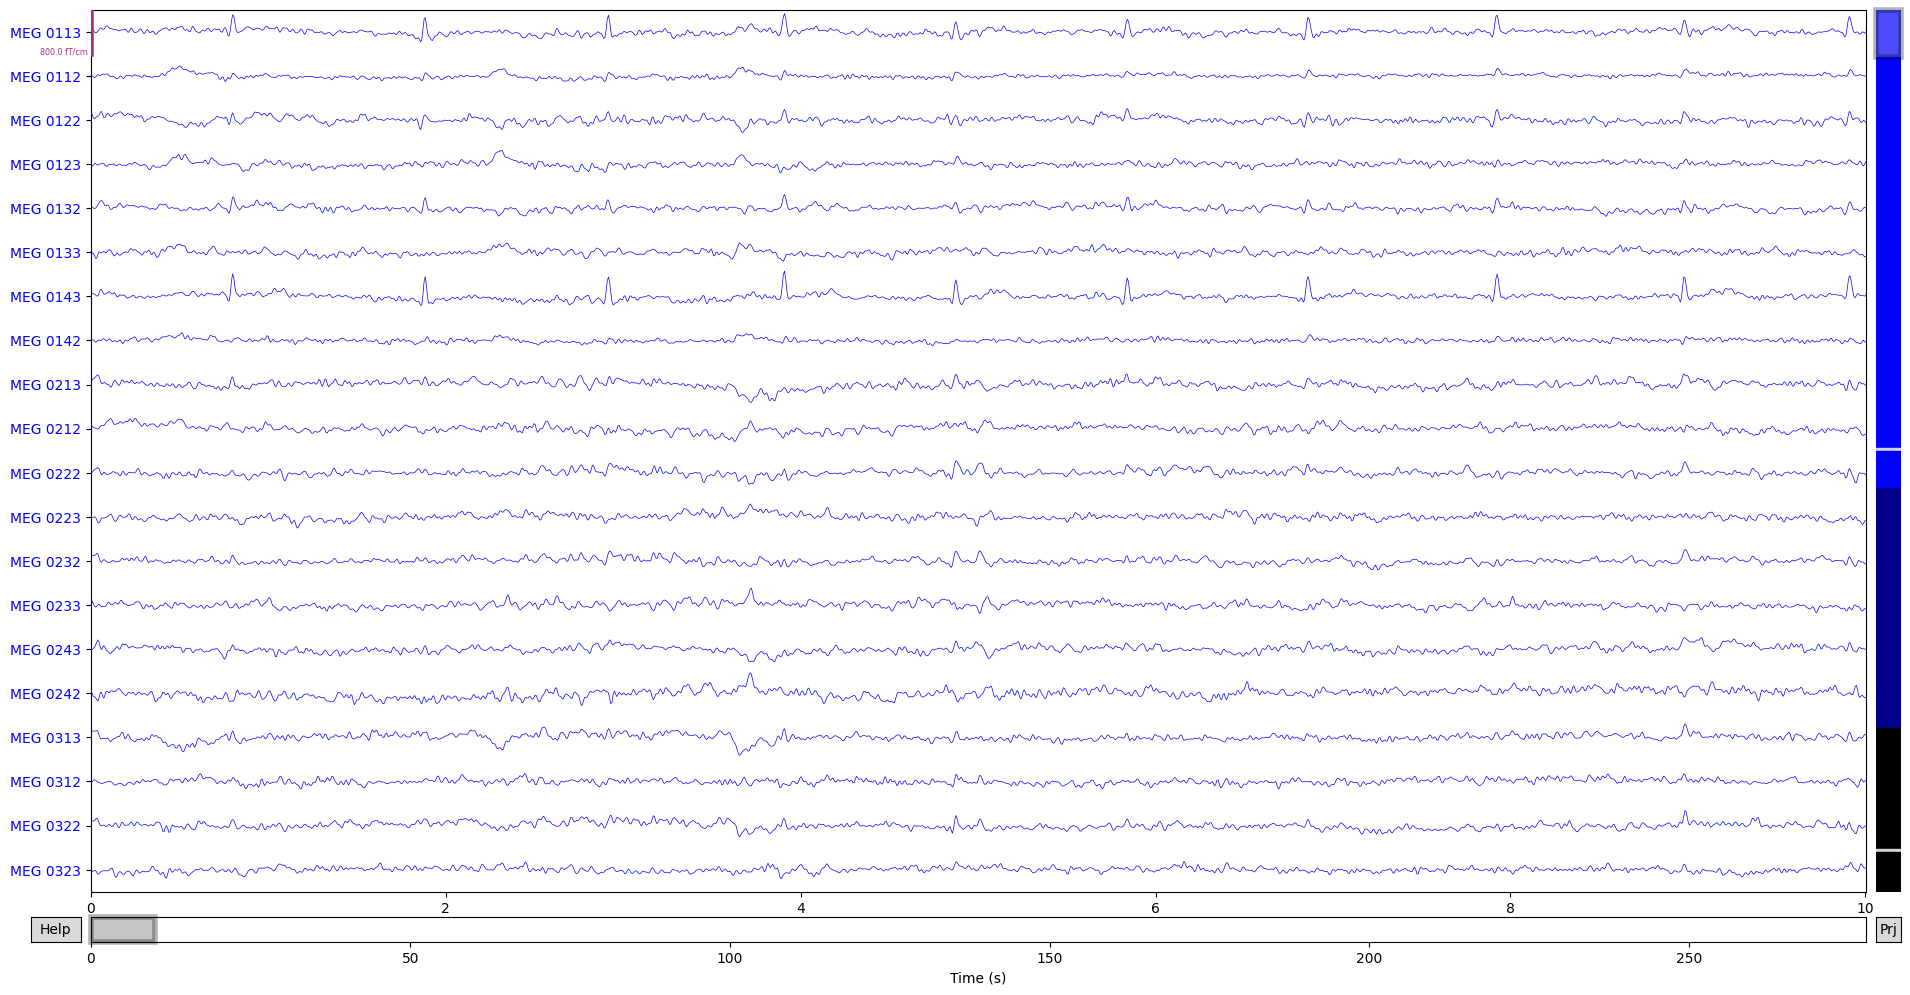

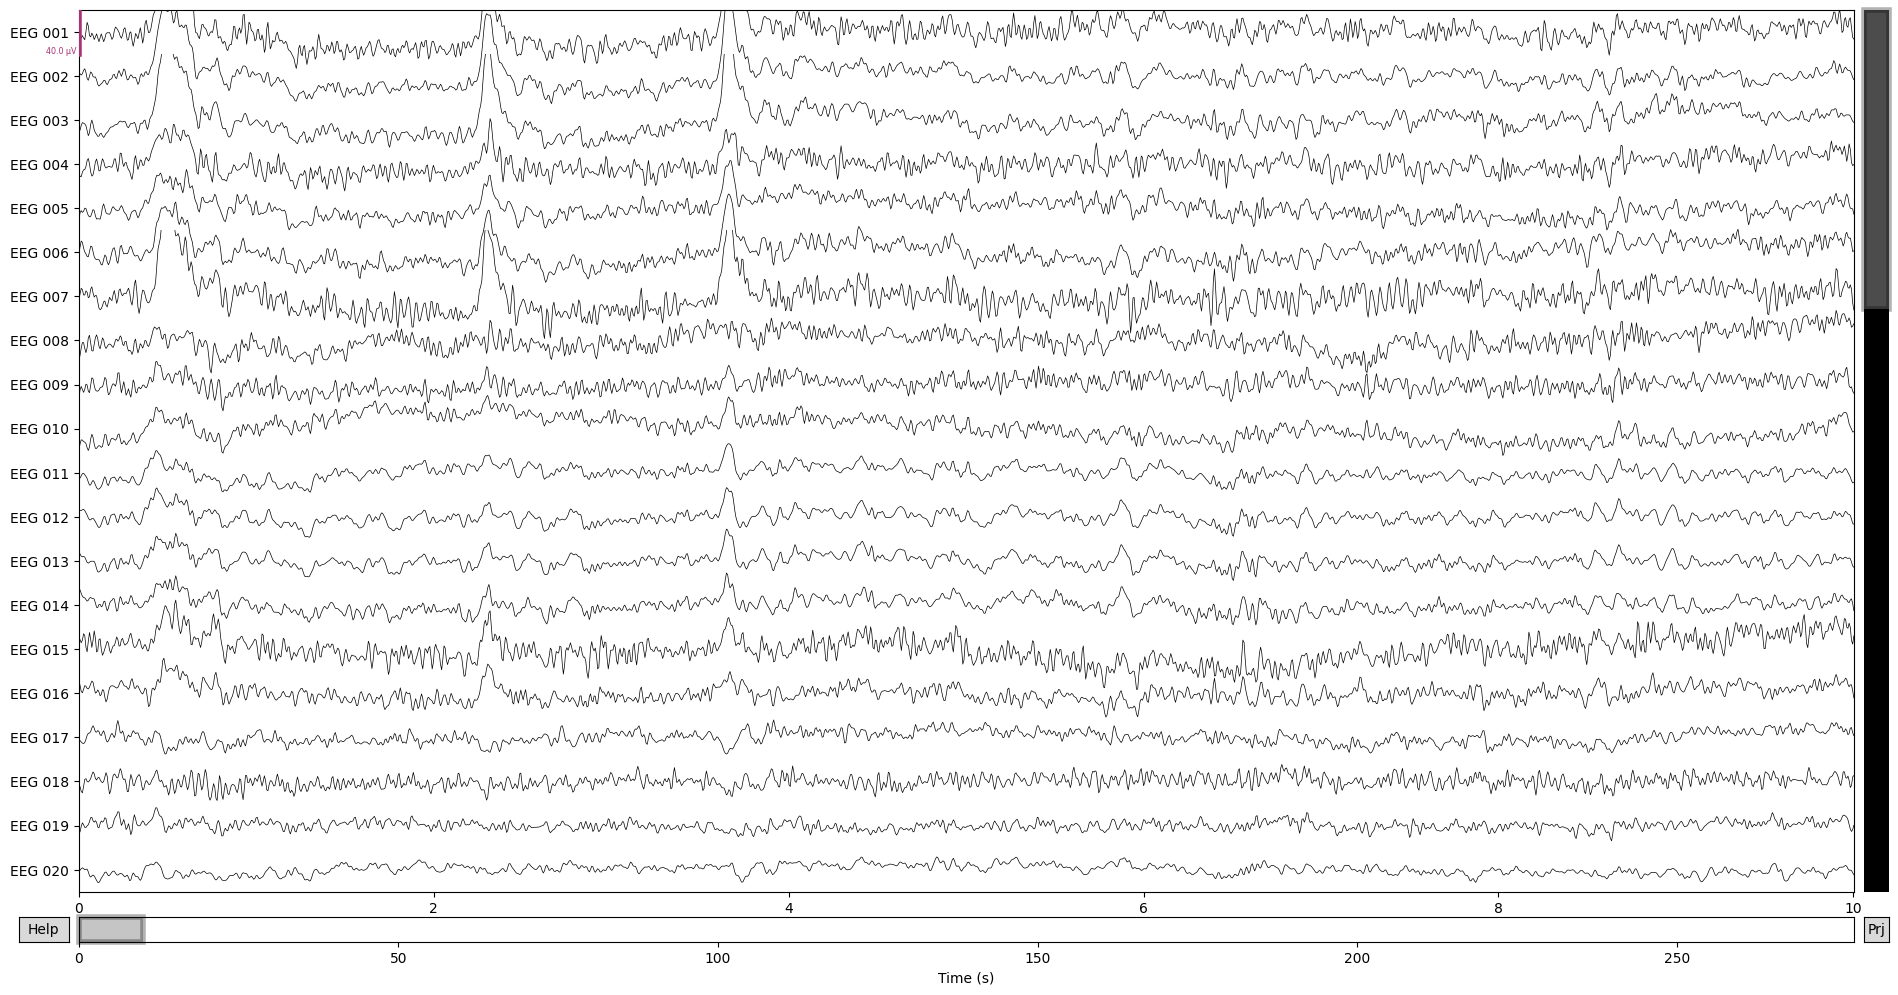

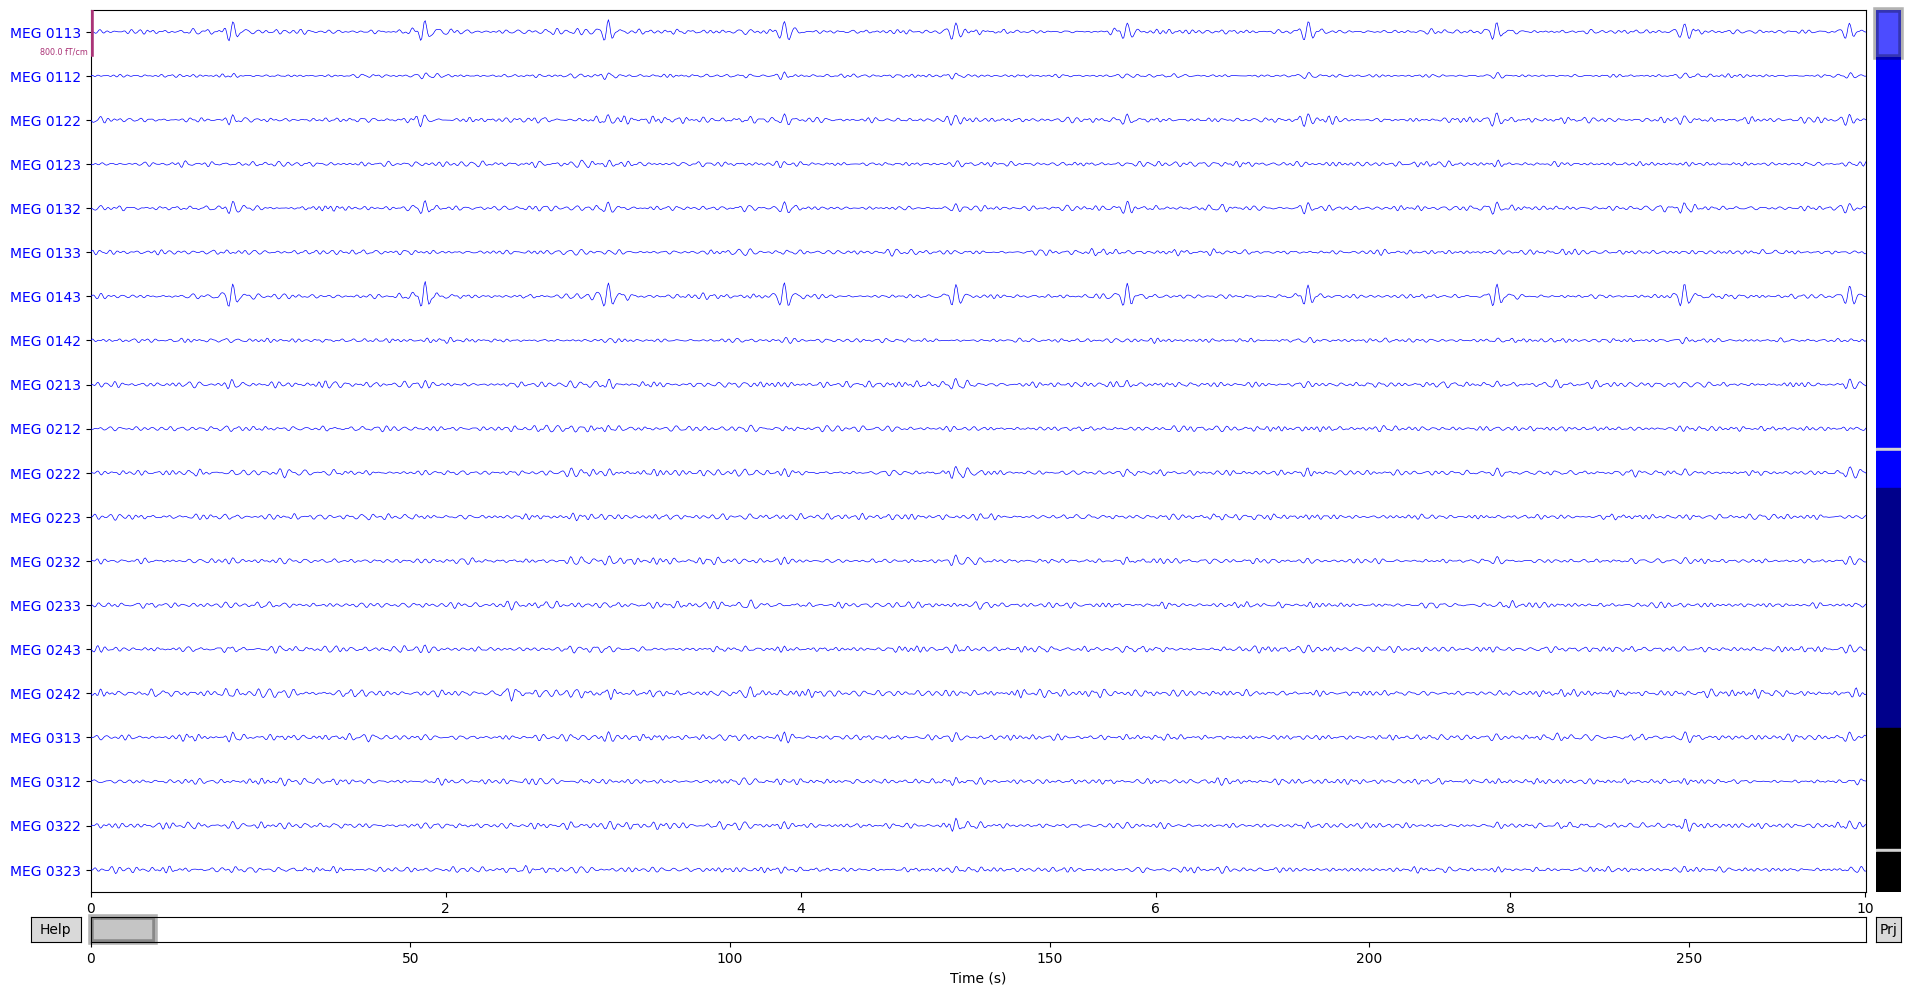

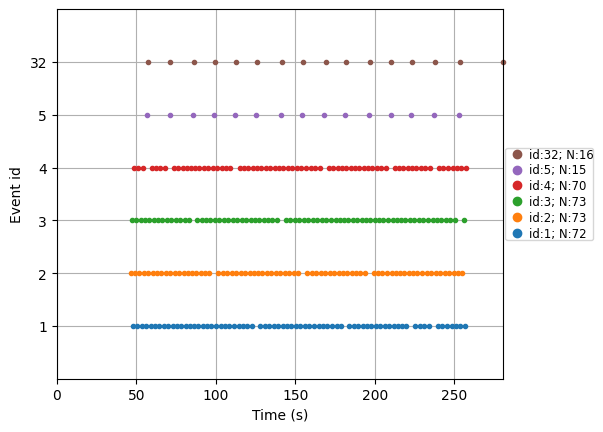

In [37]:
%matplotlib inline
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'])

We can create an event Python dictionary to keep track of which Event ID corresponds to which experimental condition. The dictionary will be used to extract epochs from continuous data. The dictionary keys can contain `/` for grouping of sub-conditions. For example, if we want to pool all auditory trials, instead of merging Event IDs 1 and 2 using the `merge_events()` function, we can request for 'auditory' to select all epochs with Event IDs 1 and 2; requesting 'left' trials will select all epochs with Event IDs 1 and 3. 


/tmp/ipykernel_26492/4040063837.py:4: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id);
/tmp/ipykernel_26492/4040063837.py:4: RuntimeWarning: event 32 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id);


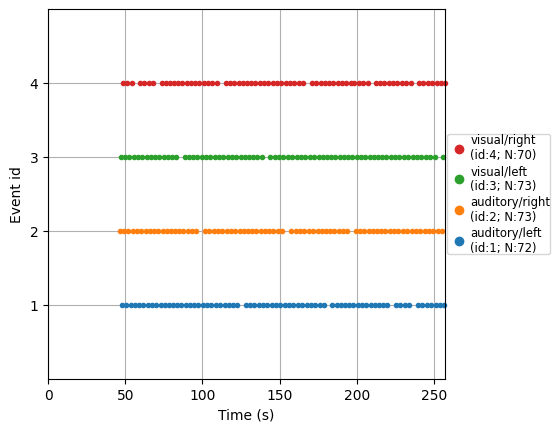

In [38]:
event_id = {"auditory/left": 1, "auditory/right": 2,
            "visual/left": 3, "visual/right": 4}

fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id);

The events can be visualized together with the raw data:

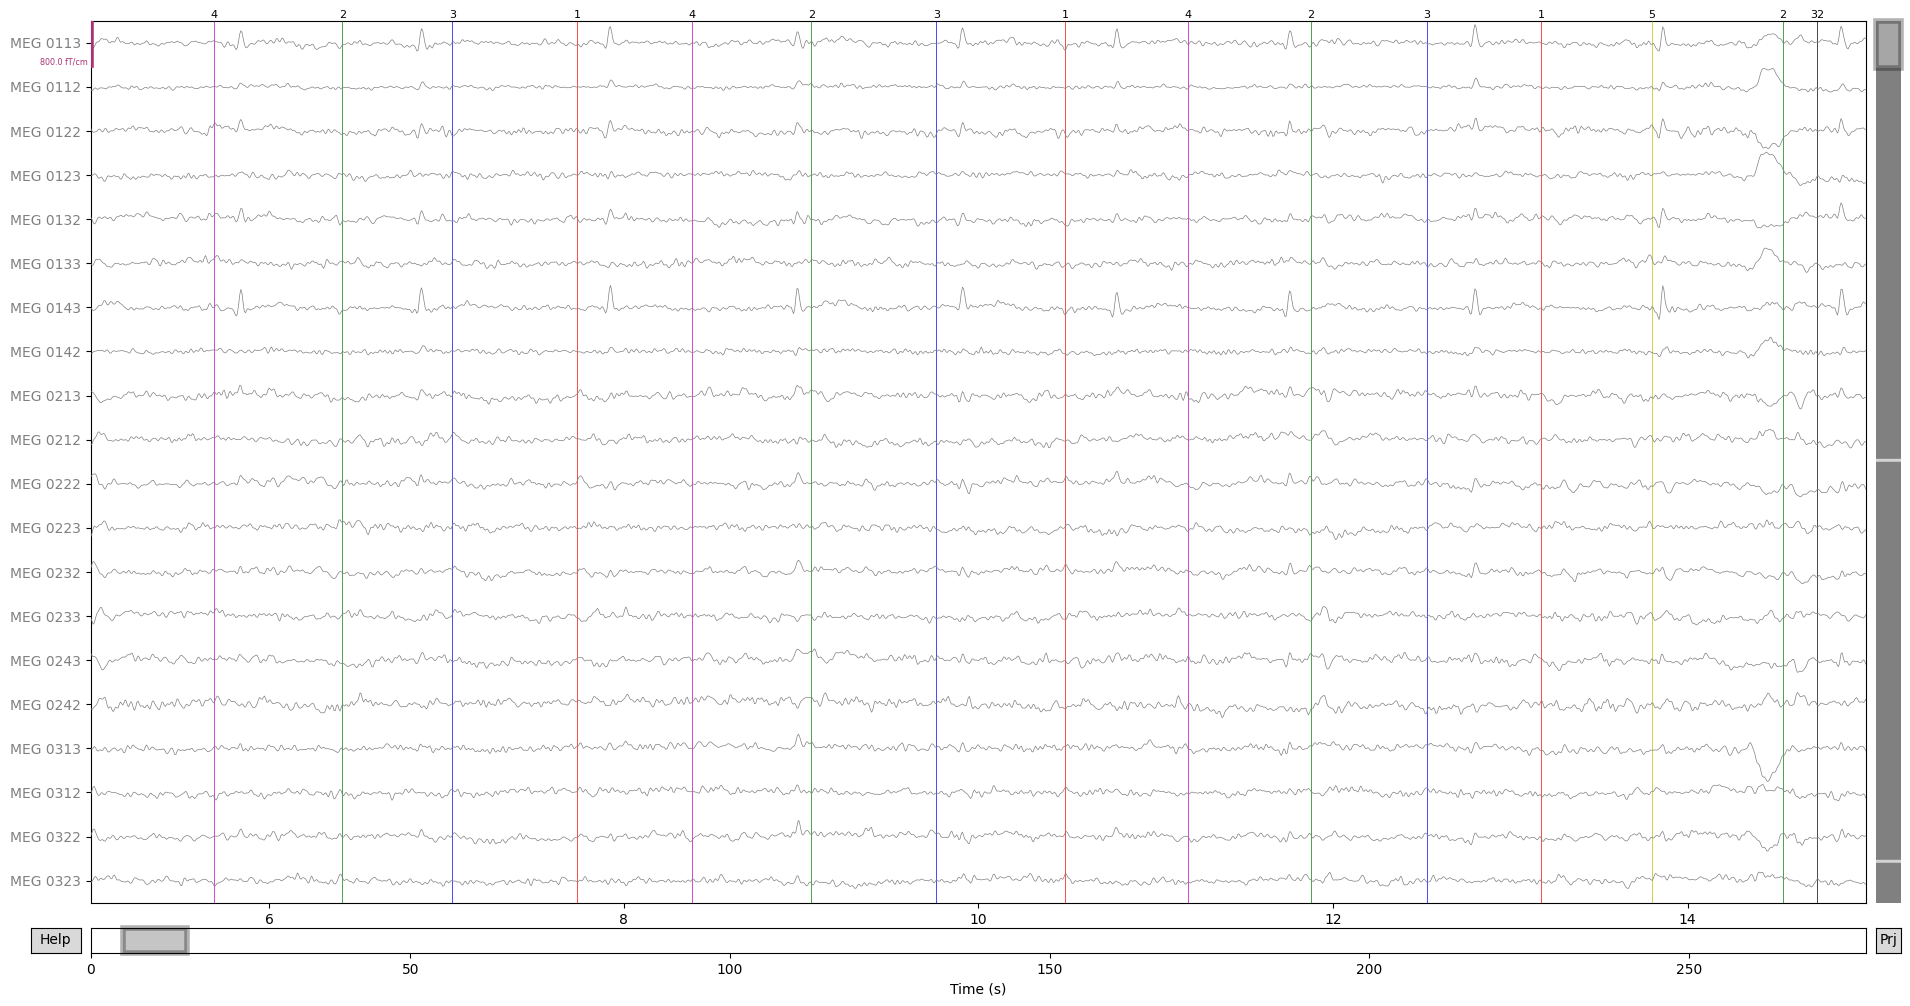

In [39]:
raw.plot(
    events=events,
    start=5,
    duration=10,
    color="gray",
    event_color={1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 32: "k"},
);

## Create epochs

In MNE-Python [`Epochs`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) objects are a data structure for representing and analyzing equal-duration trials of the M/EEG signal. Epochs are most often used to represent data that is time-locked to repeated experimental events (such as stimulus onsets or subject button presses), but can also be used for storing sequential or overlapping frames of a continuous signal (e.g., for analysis of resting-state activity). \
Inside an Epochs object, the data are stored in an array of shape `(n_epochs, n_channels, n_times)`. 

First, define epochs parameters: start, stop, and baseline period of the epochs.

In [40]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5   # end of each epoch (500ms after the trigger)
baseline = (None, 0)  # from the first time instant to the trigger pulse

Define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers, and EOG:

In [41]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

In [42]:
# we select MEG and EOG channels
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')

Extract epochs:

In [43]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline,
                    reject=reject)

In [44]:
print(epochs)

<Epochs | 288 events (good & bad), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.2 MiB, data not loaded,
 'auditory/left': 72
 'auditory/right': 73
 'visual/left': 73
 'visual/right': 70>


Remove bad epochs based on the `reject` parameter we passed to `Epochs`.

In [45]:
epochs.drop_bad()

<Epochs | 239 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.2 MiB, data not loaded,
 'auditory/left': 55
 'auditory/right': 61
 'visual/left': 67
 'visual/right': 56>

See how epochs were dropped

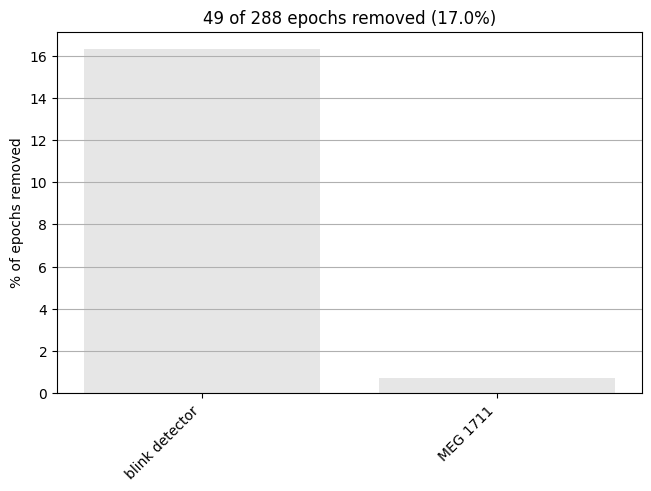

In [46]:
fig = epochs.plot_drop_log()

To access the data of some epochs use the [`get_data()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.get_data) method. 

In [47]:
epochs_data = epochs.get_data()
type(epochs_data), epochs_data.shape

(numpy.ndarray, (239, 306, 106))

`epochs_data` is a 3D array of dimension n_epochs x n_channels x n_time_points

### Visualization Epochs

See [this page](https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html) for options on how to visualize epochs. \
The `Epochs` object can be visualized (and browsed interactively) using its [`plot()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot) method



In [48]:
%matplotlib qt

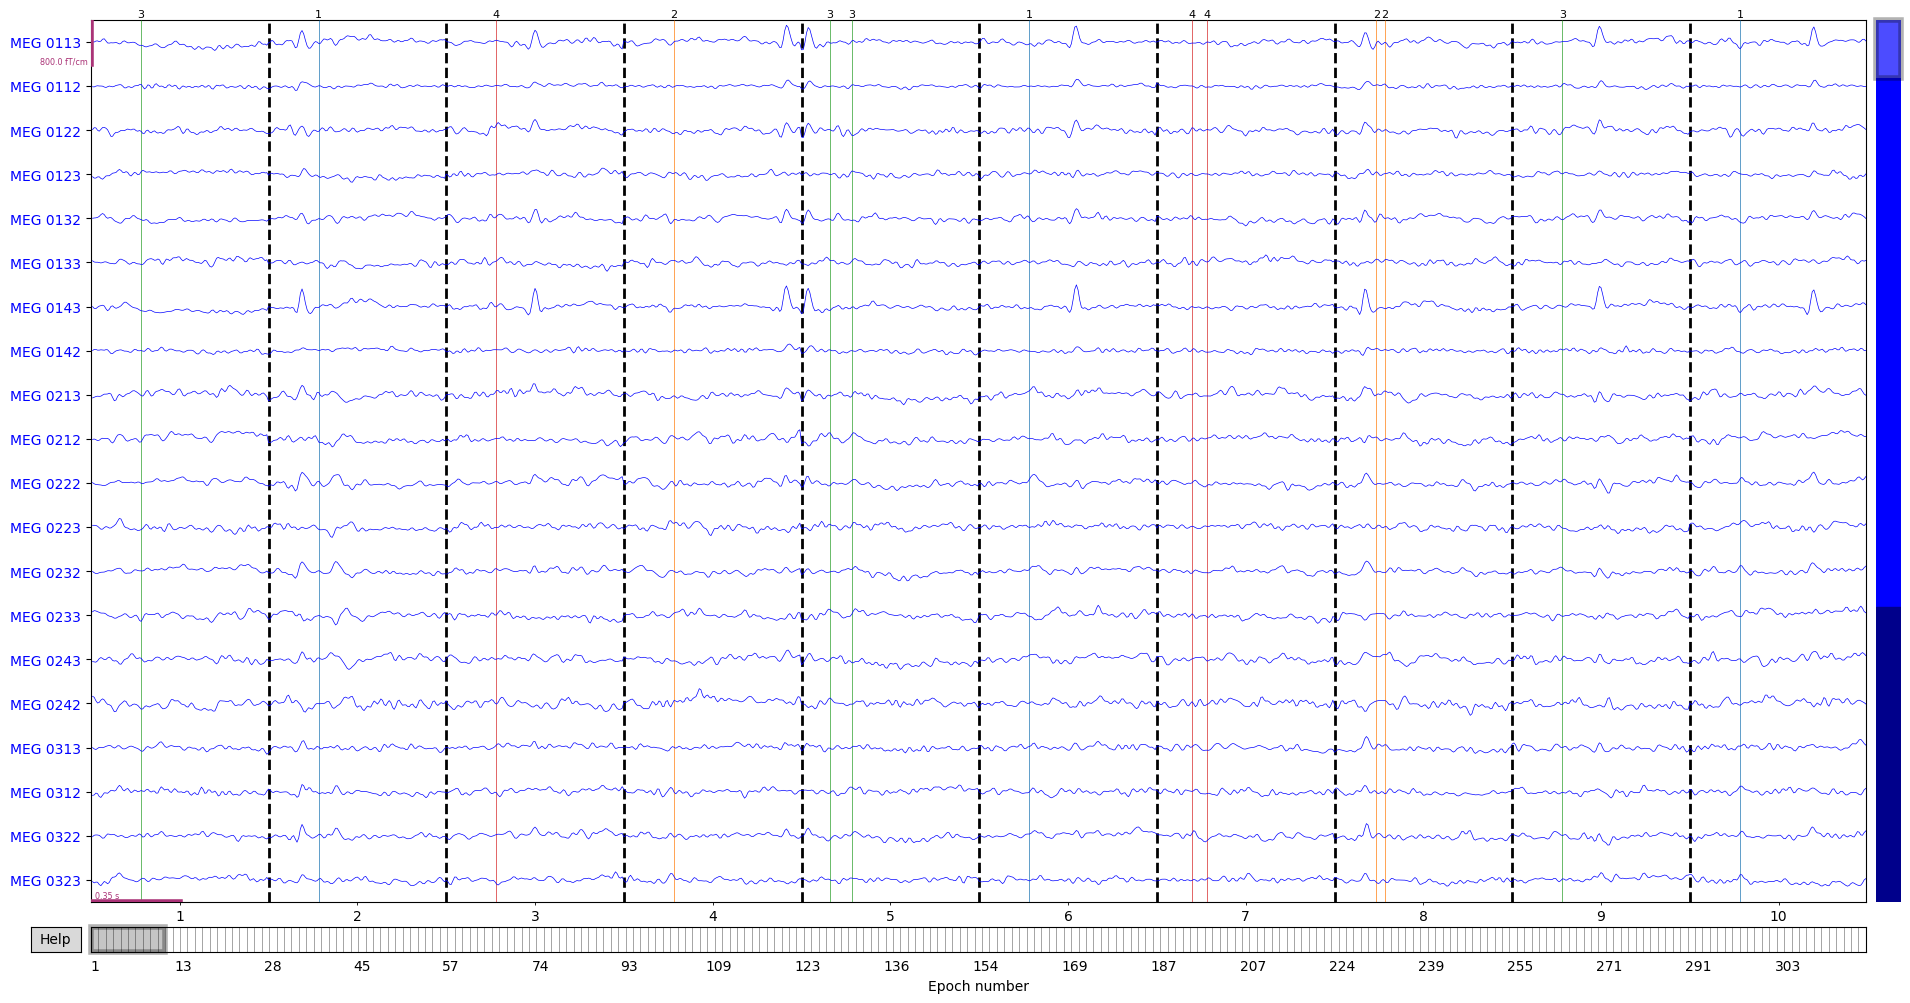

In [49]:
epochs.plot(n_epochs=10, events=True)

In the plot above we can see heartbeat artifacts in the magnetometer channels, so before we continue let’s load ECG projectors from disk and apply them to the data:

In [50]:
ecg_proj_file = data_path / "MEG" / "sample" / "sample_audvis_ecg-proj.fif"
ecg_projs = mne.read_proj(ecg_proj_file)
epochs.add_proj(ecg_projs)
epochs.apply_proj()

<Epochs | 239 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~62.4 MiB, data loaded,
 'auditory/left': 55
 'auditory/right': 61
 'visual/left': 67
 'visual/right': 56>

A convenient way to visualize many epochs simultaneously is to plot them as an image map, with each row of pixels in the image representing a single epoch, the horizontal axis representing time, and each pixel’s color representing the signal value at that time sample for that epoch.

In [51]:
figs = epochs['auditory'].plot_image(combine='mean')

It is also possible to plot spectral power estimates across sensors as a scalp topography

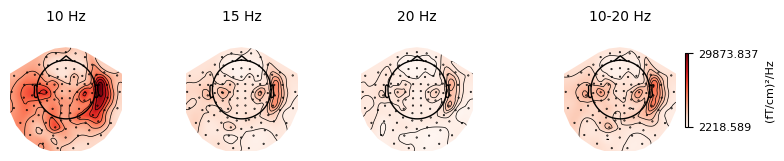

In [52]:
spectrum = epochs["visual/right"].compute_psd()
bands = {"10 Hz": 10, "15 Hz": 15, "20 Hz": 20, "10-20 Hz": (10, 20)}
spectrum.plot_topomap(bands=bands, vlim="joint", ch_type="grad")

## Average the epochs to get the evoked response (ERF/ERP)

[`Evoked`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked) objects typically store M/EEG signals that have been averaged over multiple epochs, which is a common technique for estimating stimulus-evoked activity. The data in an `Evoked` object are stored in an array of shape `(n_channels, n_times)`. \
We already have the `Epochs` object, so we can simply use its `average` method:

In [53]:
evoked = epochs.average()
print(evoked)

<Evoked | '0.23 × auditory/left + 0.26 × auditory/right + 0.28 × visual/left + 0.23 × visual/right' (average, N=239), -0.1998 – 0.49949 s, baseline -0.199795 – 0 s, 305 ch, ~3.5 MiB>


The information about the baseline period of `Epochs` is transferred to derived `Evoked` objects to maintain provenance as you process your data:

In [54]:
print(f"Epochs baseline: {epochs.baseline}")
print(f"Evoked baseline: {evoked.baseline}")

Epochs baseline: (-0.19979521315838786, 0.0)
Evoked baseline: (-0.19979521315838786, 0.0)


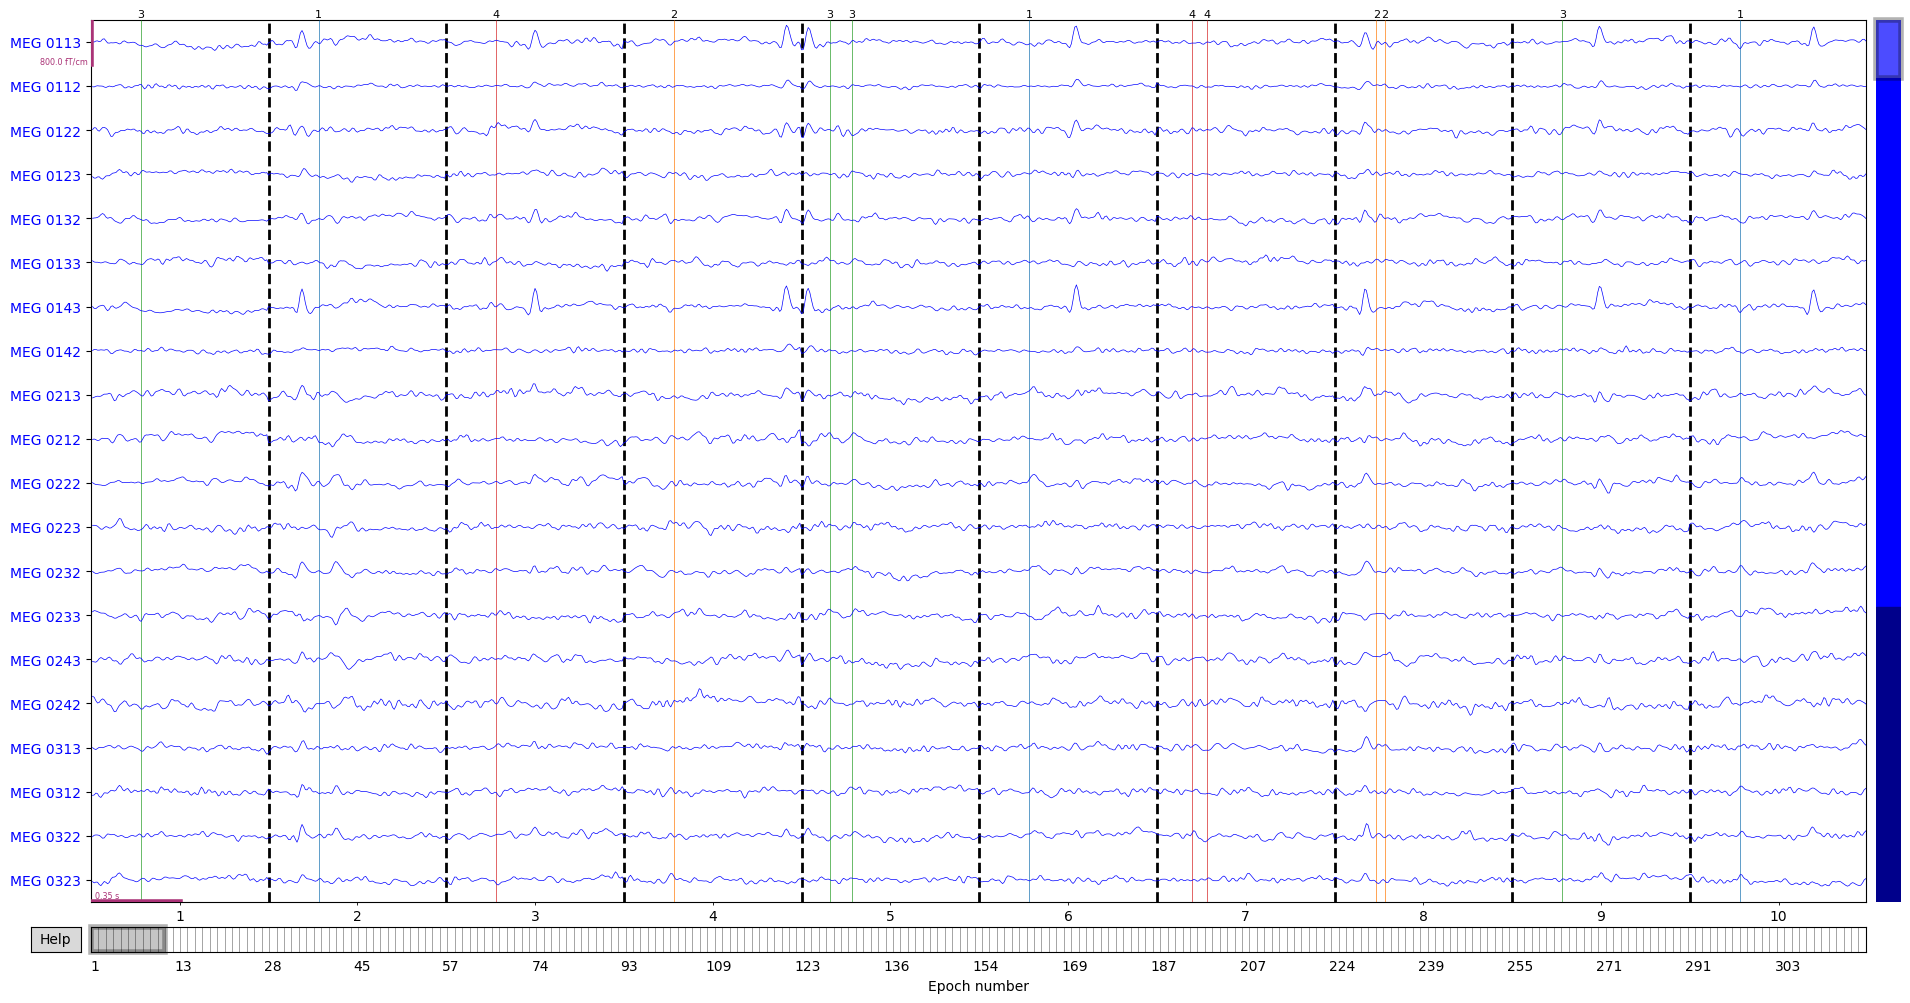

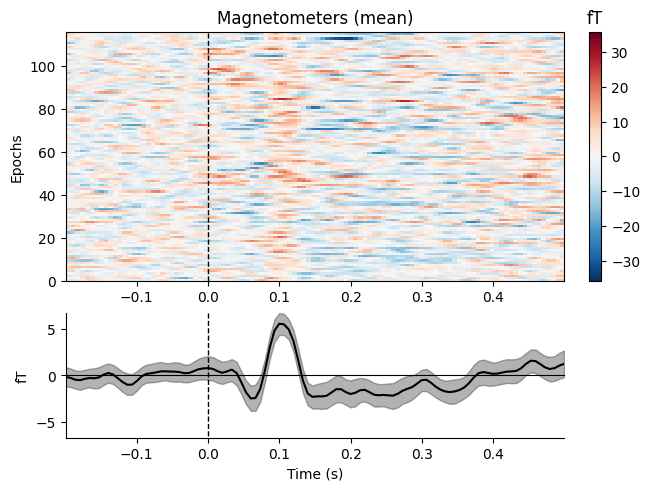

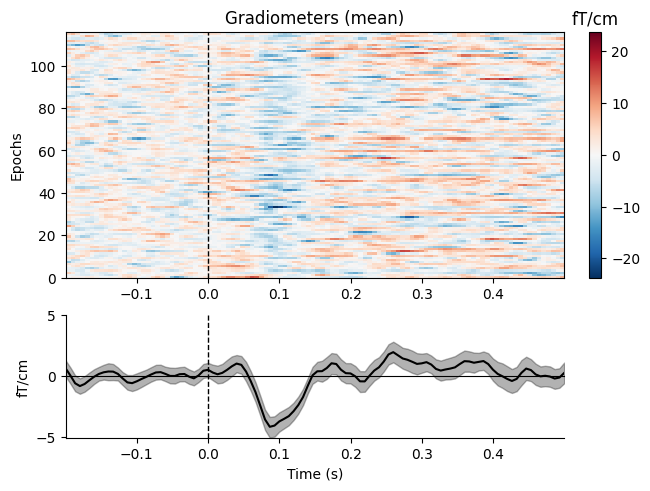

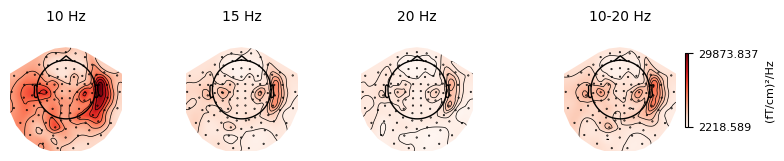

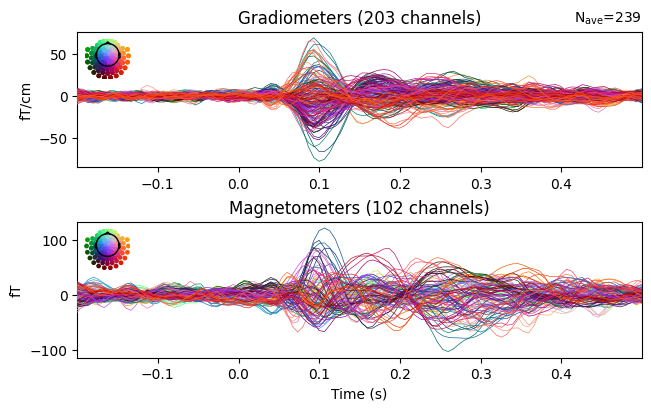

In [55]:
%matplotlib inline
fig = evoked.plot(spatial_colors=True)

This created an average across **all** conditions. Let's now estimate evoked responses for **individual** conditions.

In [56]:
print(event_id)

{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4}


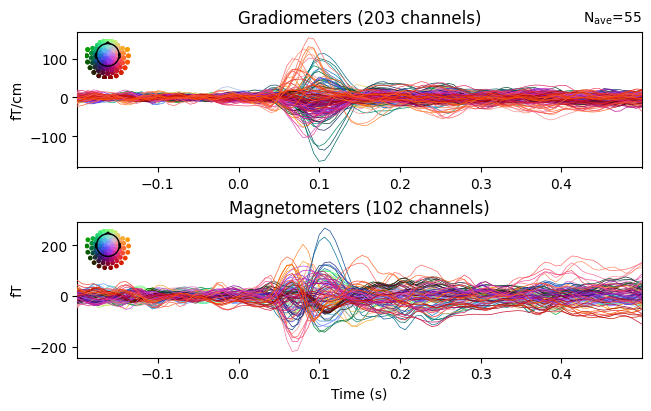

In [57]:
fig = epochs['auditory/left'].average().plot(spatial_colors=True)

The `plot()` methods for [`Raw`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot), [`Epochs`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot) and [`Evoked`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot) objects, has many parameters for customizing the plot output, such as color-coding channel traces by scalp location, or plotting the global field power alongside the channel traces. 

## Accessing and indexing epochs by condition

Epochs can be indexed by integers or slices to select a subset of epochs but also with strings to select by conditions `epochs[condition]`

Remember `/` serves as a grouping operator. To calculate the evoked response across **all** "left" stimulations, do the following:

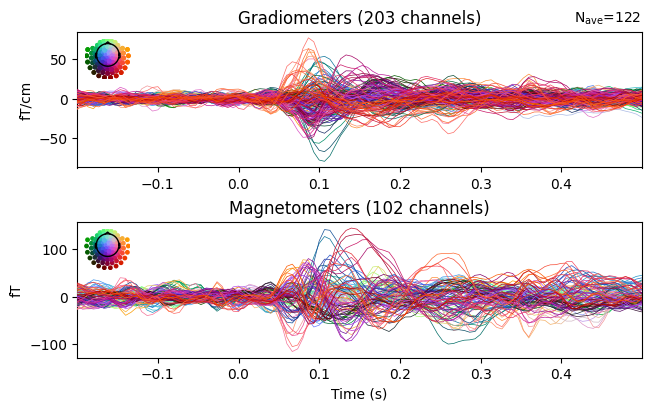

In [58]:
fig = epochs['left'].average().plot(spatial_colors=True);  # note the legend

In [59]:
# remember ...
event_id

{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4}

In [60]:
epochs[0]  # first epoch

<Epochs | 1 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.5 MiB, data loaded,
 'visual/left': 1>

In [61]:
epochs[:10]  # first 10 epochs

<Epochs | 10 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~5.7 MiB, data loaded,
 'auditory/left': 3
 'auditory/right': 2
 'visual/left': 3
 'visual/right': 2>

In [62]:
epochs['visual/left']  # epochs for the left visual condition

<Epochs | 67 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~19.8 MiB, data loaded,
 'visual/left': 67>

In [63]:
epochs['visual']  # epochs for the visual condition (either left or right)

<Epochs | 123 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~33.7 MiB, data loaded,
 'visual/left': 67
 'visual/right': 56>

In [64]:
epochs['left']

<Epochs | 122 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~33.4 MiB, data loaded,
 'auditory/left': 55
 'visual/left': 67>

In event_id, `/` selects conditions in a hierarchical way, e.g. here, "auditory" vs. "visual", "left" vs. "right", and MNE can select them individually.

In [65]:
%matplotlib qt

In [66]:
evoked_auditory_left = epochs['auditory/left'].average().pick_types(meg='grad')
evoked_auditory_left.crop(None, 0.2) # Beginning of evoked until 0.2s after stimulus onset.
fig = evoked_auditory_left.plot(spatial_colors=True)
fig = evoked_auditory_left.plot(spatial_colors=True, gfp=True)

In the interactive session, the butterfly plots seen above can be click-dragged to select a time region, which will pop up a map of the average field distribution over the scalp for the selected time span.

## Visualize Topographies

The scalp topographies at specific times or time spans can be also generated by using the [`plot_topomap()`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap) method


In [67]:
fig = evoked.plot_topomap(ch_type='mag', times=[0.05, 0.1, 0.15])
fig = evoked.plot_topomap(ch_type='grad', times=[0.05, 0.1, 0.15])

In [68]:
import numpy as np

times = np.linspace(0.05, 0.15, 5)
for ch_type in ('mag', 'grad'):
    fig = evoked.plot_topomap(times=times, ch_type=ch_type)

It is also possible to pass different time durations to average over for each time point. Passing a value of None will disable averaging for that time point:

In [69]:
averaging_durations = [0.01, 0.02, 0.03, None, None]
fig = evoked.plot_topomap(
    ch_type="mag", times=times, average=averaging_durations
)

[`plot_joint()`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_joint) combines butterfly plots with scalp topographies, and provide an excellent first-look at evoked data; by default, topographies will be automatically placed based on peak finding.


In [70]:
figs = evoked.plot_joint()

But of course, you can also specify custom time points for the topomaps.

In [71]:
figs = evoked.plot_joint(times=[0.1, 0.3])

Let's visualize topomaps for all experimental conditions.

In [72]:
for condition in event_id:
    fig = epochs[condition].average().plot_topomap(times=[0.1, 0.15])

### Compute a contrast

The function [`combine_evoked()`](https://mne.tools/stable/generated/mne.combine_evoked.html#mne.combine_evoked) computes a weighted sum of the `Evoked` objects given to it. Note that this combines evokeds taking into account the number of averaged epochs (to scale the noise variance)


In [73]:
evoked_left = epochs['auditory/left'].average()
evoked_right = epochs['auditory/right'].average()

evoked_contrast = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])

In [74]:
fig = evoked_left.plot()
fig = evoked_right.plot()
fig = evoked_contrast.plot()

Plot some topographies:

In [75]:
vmin, vmax = -4, 4  # Colorbar range
fig = evoked_left.plot_topomap(ch_type='grad')
fig = evoked_right.plot_topomap(ch_type='grad')
fig = evoked_contrast.plot_topomap(ch_type='grad')

/home/hyruuk/GitHub/cocolab/mne_meeg_ml_main/env/lib/python3.10/site-packages/mne/viz/_mpl_figure.py:2355: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


### EXERCISE
- Extract Epochs restricted to magnetometers on unfiltered data (`sample_audvis_raw.fif`)
- Plot the difference between all *visual* and all *auditory* stimulus presentations
- Recompute everything for EEG

<div class="alert alert-block alert-info">
<b>Note:</b> For more details look at the following tutorials: <br>
    <a href="https://mne.tools/stable/auto_tutorials/raw/index.html" target="_blank">Working with continuous data </a> <br>
    <a href="https://mne.tools/stable/auto_tutorials/epochs/index.html" target="_blank">Segmenting continuous data into epochs</a> <br>
    <a href="https://mne.tools/stable/auto_tutorials/evoked/index.html" target="_blank">Estimating evoked responses</a>
</div>
